In [1]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 500)


In [2]:
def asf_project(pr):
    name = pr.split("-")[0]
    if name == "incubator":
        return pr.split("-")[1]
    return name

In [3]:
project = "ozone"

In [4]:
# Parameters
project = "netbeans"


In [5]:
actions = pd.read_csv("github-action-run.csv.gz")
                          
actions.createdat = pd.to_datetime(actions.createdat * 1000000, utc = True)
actions.updatedat = pd.to_datetime(actions.updatedat * 1000000, utc = True)
actions.firstjobstarted = pd.to_datetime(actions.firstjobstarted * 1000000, utc = True)
actions.lastjobcompleted = pd.to_datetime(actions.lastjobcompleted * 1000000, utc = True)                

In [6]:
actions["project"] = actions.repo.apply(asf_project)
actions["jobhours"] = actions.jobseconds / 60 / 60
actions["month"] = actions.createdat.dt.strftime("%Y-%m")

In [7]:
actions =  actions[actions.month.isin(["2021-03","2021-02"])]
last_month = "2021-03"
actions = actions[actions.project == project]

## Number of jobhours used by month

Maximum available value is 180 * 24 * days == 129600 (30 days) .. 133920 (31 days)

In [8]:
actions[["jobhours"]].groupby([actions.project,actions.month]).count().reset_index().groupby("month").sum()

,jobhours
month,
2021-02,215
2021-03,253


## Number of jobs executed by git repositories (last month)

In [9]:
actions[actions.month == last_month][["repo","jobhours"]].groupby("repo").agg({"jobhours":["sum","mean", "max"]}).sort_values(('jobhours',"sum"), ascending=False).head(20)

jobhours                    
                  sum      mean       max
repo                                     
netbeans  1305.354444  5.159504  6.463611

## Job hour statustics per workflows

In [10]:
actions[actions.month == last_month][["repo","workflowid","jobhours"]].groupby(["repo","workflowid"]).agg({"jobhours":["sum","mean", "max"]}).sort_values(('jobhours',"sum"), ascending=False)

jobhours                    
                             sum      mean       max
repo     workflowid                                 
netbeans 1391713     1305.258889  5.179599  6.463611
         5273792        0.095556  0.095556  0.095556

## Slowest workflow runs


In [11]:
actions.sort_values("jobhours", ascending=False).head(25)

,org,repo,id,runnumber,createdat,updatedat,status,conclusion,workflowid,firstjobstarted,lastjobcompleted,jobdetails,jobs,jobseconds,project,jobhours,month
753161,apache,netbeans,593598833,2107,2021-02-23 19:04:27+00:00,2021-02-23 21:35:01+00:00,completed,failure,1391713,2021-02-23 19:04:43+00:00,2021-02-23 21:34:59+00:00,True,6,27975,netbeans,7.770833,2021-02
753170,apache,netbeans,595715196,2115,2021-02-24 10:29:23+00:00,2021-02-24 13:32:14+00:00,completed,success,1391713,2021-02-24 10:29:40+00:00,2021-02-24 13:32:07+00:00,True,6,25919,netbeans,7.199722,2021-02
753171,apache,netbeans,596546812,2116,2021-02-24 15:46:07+00:00,2021-02-24 18:32:41+00:00,completed,failure,1391713,2021-02-24 15:46:31+00:00,2021-02-24 18:24:22+00:00,True,6,23784,netbeans,6.606667,2021-02
753082,apache,netbeans,561496364,2036,2021-02-12 15:59:23+00:00,2021-02-12 18:23:13+00:00,completed,success,1391713,2021-02-12 15:59:35+00:00,2021-02-12 18:23:06+00:00,True,6,23364,netbeans,6.490000,2021-02
753113,apache,netbeans,572568146,2064,2021-02-16 18:57:57+00:00,2021-02-16 21:38:15+00:00,completed,success,1391713,2021-02-16 18:58:10+00:00,2021-02-16 21:36:41+00:00,True,6,23281,netbeans,6.466944,2021-02
753342,apache,netbeans,678689874,2271,2021-03-23 06:54:28+00:00,2021-03-23 09:34:42+00:00,completed,failure,1391713,2021-03-23 06:54:35+00:00,2021-03-23 09:28:00+00:00,True,6,23269,netbeans,6.463611,2021-03
753257,apache,netbeans,646488476,2194,2021-03-12 14:30:22+00:00,2021-03-12 17:12:58+00:00,completed,success,1391713,2021-03-12 14:30:35+00:00,2021-03-12 17:02:52+00:00,True,6,23115,netbeans,6.420833,2021-03
753104,apache,netbeans,571281243,2056,2021-02-16 10:24:17+00:00,2021-02-16 13:04:39+00:00,completed,success,1391713,2021-02-16 10:24:33+00:00,2021-02-16 13:00:48+00:00,True,6,23099,netbeans,6.416389,2021-02
753235,apache,netbeans,638434953,2174,2021-03-10 07:06:28+00:00,2021-03-10 09:47:31+00:00,completed,success,1391713,2021-03-10 07:06:43+00:00,2021-03-10 09:38:39+00:00,True,6,23057,netbeans,6.404722,2021-03
753234,apache,netbeans,638033679,2173,2021-03-10 03:53:40+00:00,2021-03-10 06:33:55+00:00,completed,success,1391713,2021-03-10 03:53:50+00:00,2021-03-10 06:29:38+00:00,True,6,23044,netbeans,6.401111,2021-03


In [12]:
job = pd.read_csv("github-action-job.csv.gz")                          
job.startedat = pd.to_datetime(job.startedat * 1000000, utc = True)
job.completedat = pd.to_datetime(job.completedat * 1000000, utc = True)
job["project"] = job.repo.apply(asf_project)

In [13]:
job["jobhours"] = (job.completedat - job.startedat).dt.seconds / 60 / 60

In [14]:
job = job[job.project == project]

## Slowest job executions by job names

In [15]:
job[["jobhours"]].groupby([job.org,job.repo, job.name]).sum().reset_index().sort_values("jobhours", ascending=False).head(25)

,org,repo,name,jobhours
6,apache,netbeans,Windows build,1111.389722
4,apache,netbeans,Linux build of PHP cluster,1012.700000
1,apache,netbeans,Check Javadoc build,425.168056
5,apache,netbeans,MacOS build,288.601667
3,apache,netbeans,Commit-validation (on Linux),161.563333
0,apache,netbeans,Check Build System,102.330556
8,apache,netbeans,build-macos,0.407222
9,apache,netbeans,build-windows,0.357500
2,apache,netbeans,Commit Validation (on Linux),0.283889
7,apache,netbeans,build-linux,0.216111


## Number of job executions per status

In [16]:
job[["id"]].groupby([job.org,job.repo,  job.conclusion]).count().reset_index().sort_values("id", ascending=False).head(25)

,org,repo,conclusion,id
2,apache,netbeans,success,3138
1,apache,netbeans,failure,374
0,apache,netbeans,cancelled,24


In [17]:
start = job.loc[:,["org","repo","project","id","runid","startedat"]]
start["value"] = 1
start = start.rename(columns={"startedat":"date"})

end = job.loc[:,["org","repo","project","id","runid","completedat"]]
end["value"] = -1
end = end.rename(columns={"completedat":"date"})
events = pd.concat([start, end]).sort_values("date")
events["running"] = events.value.cumsum()


## Average (12h window) parallel running/queued job at a given time

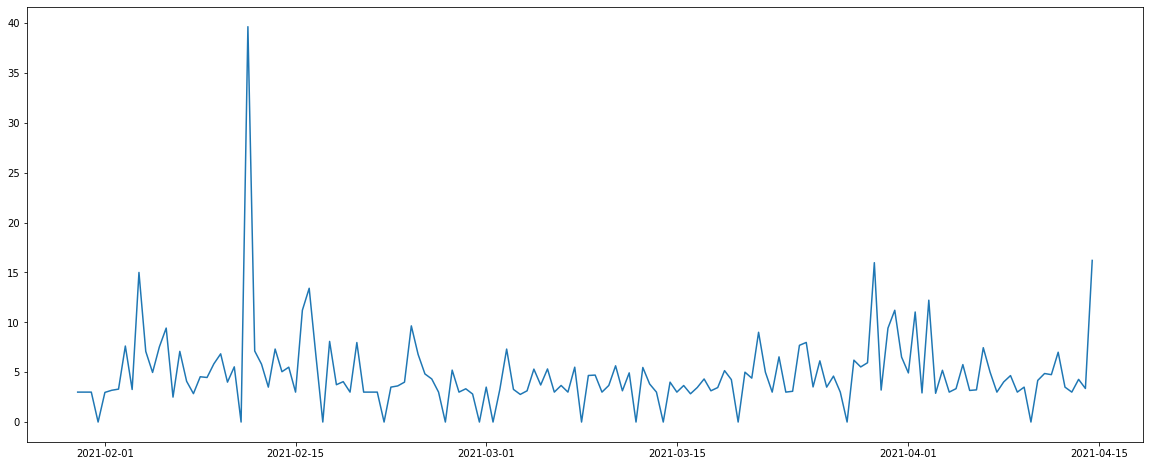

In [18]:

r = events.set_index('date')
r = r.sort_index()
r = r.resample("12H").mean().fillna(0)

plt.figure(figsize=(20,8))
plt.plot(r.index,r.running)
plt.show()

In [19]:
## Max (12h window) parallel running/queued job at a given time

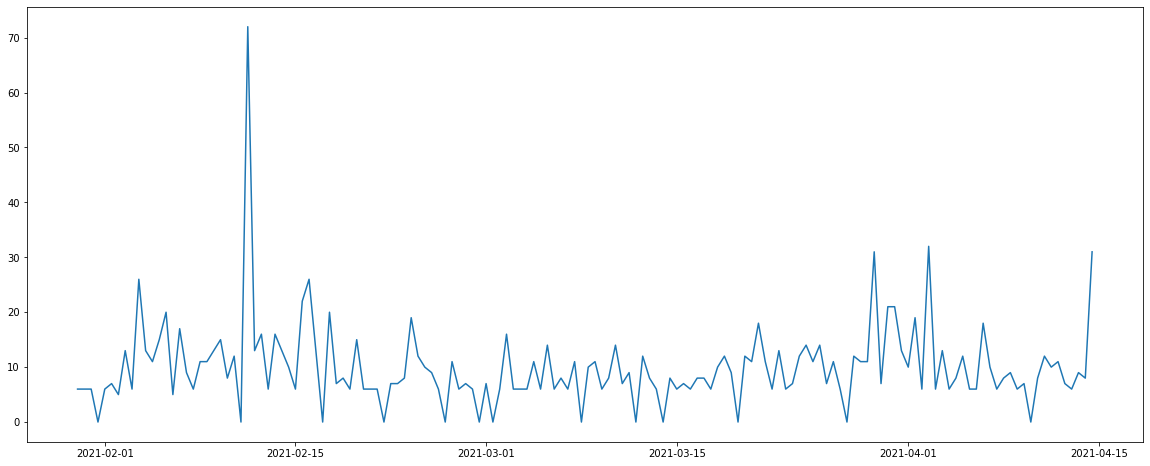

In [20]:

r = events.set_index('date')
r = r.sort_index()
r = r.resample("12H").max().fillna(0)

plt.figure(figsize=(20,8))
plt.plot(r.index,r.running)
plt.show()